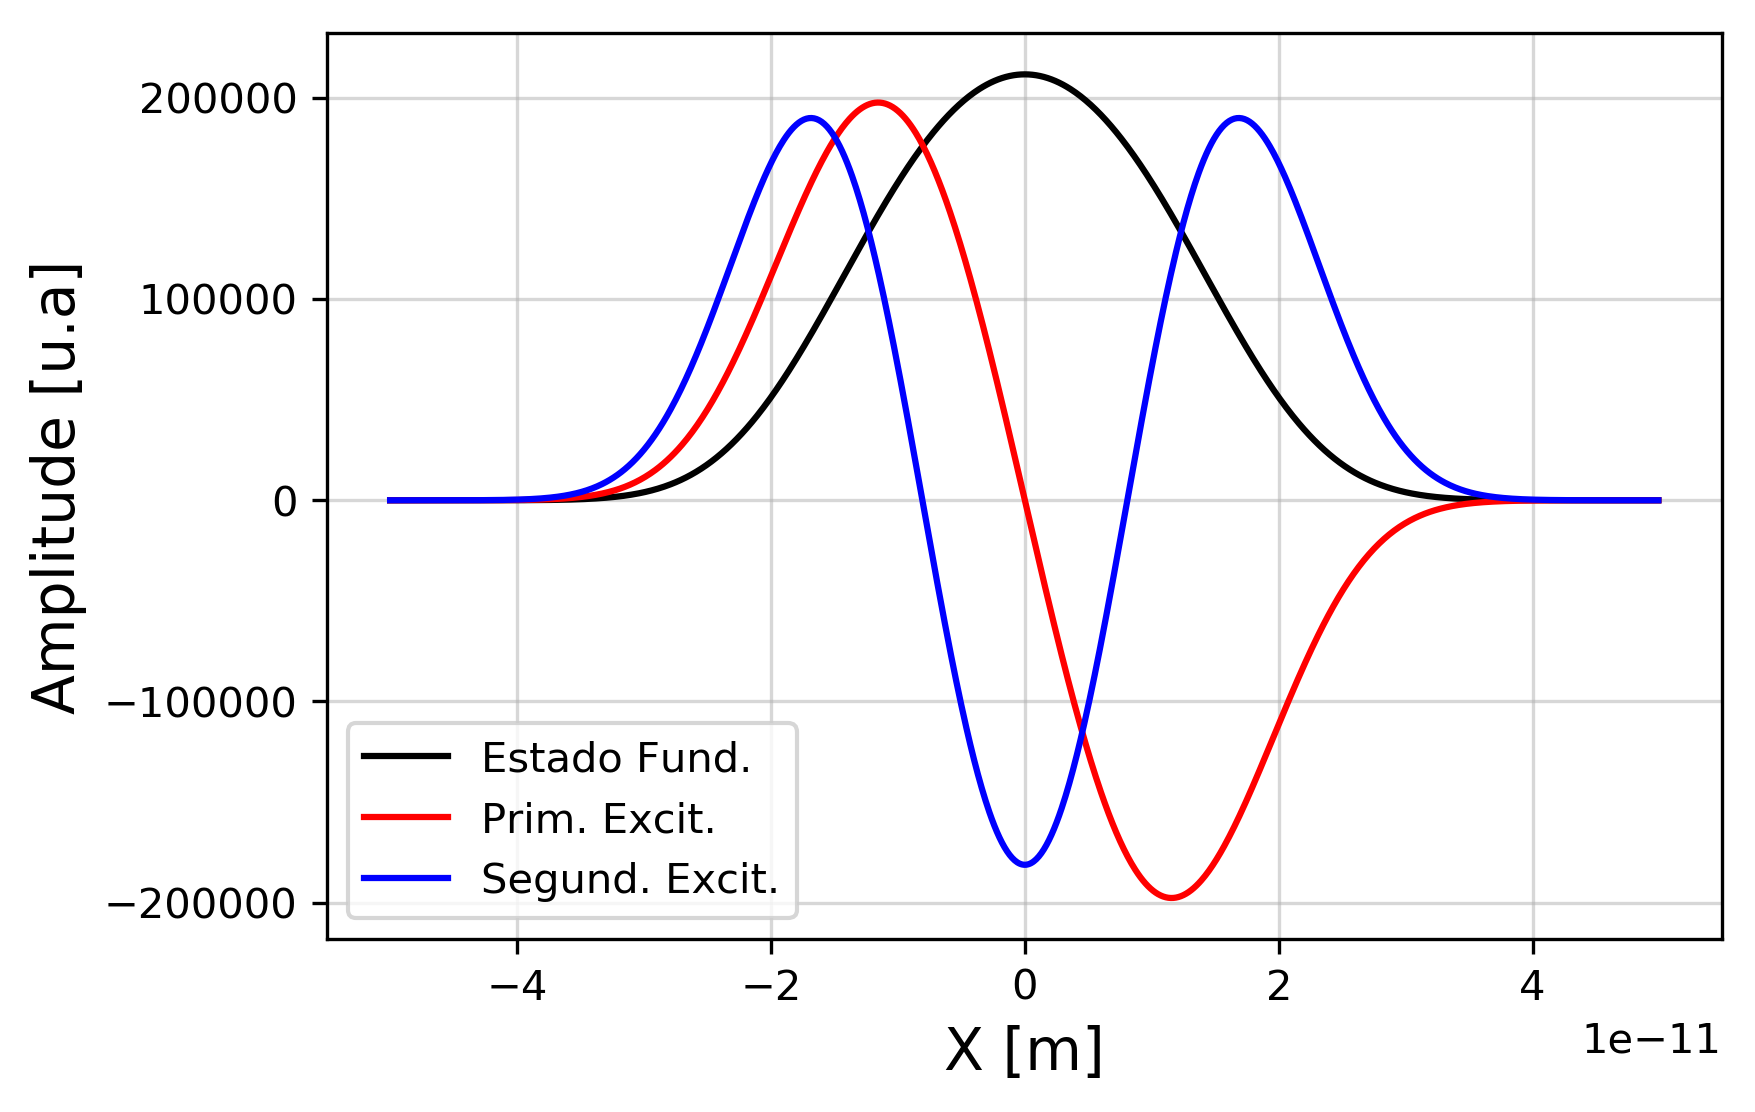

1.0000000000000002


In [2]:
import numpy as np
import matplotlib.pyplot as plt

m     = 9.109383701e-31  #[Kg]
hbar  = 1.054516817e-34  #[J*s]
e     = 1.602176634e-19  #[C]
V0    = 50*e             #[J]
a     = 1.0e-11          #[m]
N     = 1000
h     = 10*a/N

X = np.arange(-5*a,5*a,h)

def V(x):
    return V0*(x/a)**4

def F(r,x,E):
    psi = r[0]
    phi = r[1]
    Fpsi = phi
    Fphi = (2*m/hbar**2)*(V(x)-E)*psi
    return np.array([Fpsi,Fphi],float)

def Schrd_Solve(r0,E):
    r   = r0.copy()
    Psi = np.array([],float)
    for x in X:
        Psi = np.append(Psi, r[0])
        k1 = h*F(r,x,E)
        k2 = h*F(r+0.5*k1,x+0.5*h,E)
        k3 = h*F(r+0.5*k2,x+0.5*h,E)
        k4 = h*F(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6
    return Psi 

def Wave_f_norm(Wave_f):
    integral = 0
    for i in range(len(Wave_f)):
        integral += (Wave_f[i]**2)*h
    return np.sqrt(integral)

r0 = np.array([0.0,1.0])
err = e/1e5

E_array = np.array([], float)

E1 = 0
E2 = e
psi2 = Schrd_Solve(r0,E1)[-1]

for k in range(3):
    while abs(E2 - E1) > err:
        psi1, psi2 = psi2, Schrd_Solve(r0,E2)[-1]
        E1,E2 = E2, E2 - psi2*(E2 - E1)/(psi2 - psi1)
    
    E_array = np.append(E_array,E2)
    E1 = E2*2
    E2 = E1 + e

Psi_0 = Schrd_Solve(r0, E_array[0])
Psi_1 = Schrd_Solve(r0, E_array[1])
Psi_2 = Schrd_Solve(r0, E_array[2])

Psi_norm = [Psi_0/Wave_f_norm(Psi_0), Psi_1/Wave_f_norm(Psi_1), Psi_2/Wave_f_norm(Psi_2)] 
color    = ['-k', '-r', '-b']
names    = ['Estado Fund.', 'Prim. Excit.', 'Segund. Excit.']

plt.figure(dpi = 300)
plt.xlabel('X [m]', size = 14)
plt.ylabel('Amplitude [u.a]', size = 14)
plt.grid(alpha = 0.5)
for i in range(3):
    plt.plot(X,Psi_norm[i], color[i], label = names[i])
plt.legend(loc = 'best')
plt.savefig('im_8_14c')
plt.show()